---
---
# Analysing the Pew Survey Data of COVID19

---
---

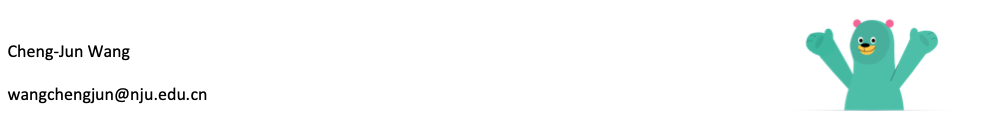

## American Trends Panel Wave 48

阅读 https://www.journalism.org/dataset/election-news-pathways-april-2020-survey/

1. 下载Pathways-April-2020-ATP-W66-1.zip 数据，该数据来自pewresearch针对2020年总统选举所做的panel study中的一次，其中加入了关于covid19的部分问题。
https://www.people-press.org/dataset/american-trends-panel-wave-48/

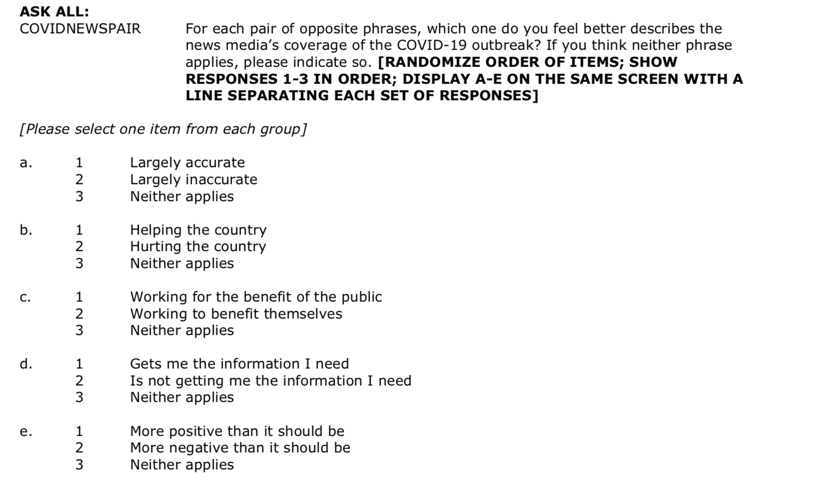

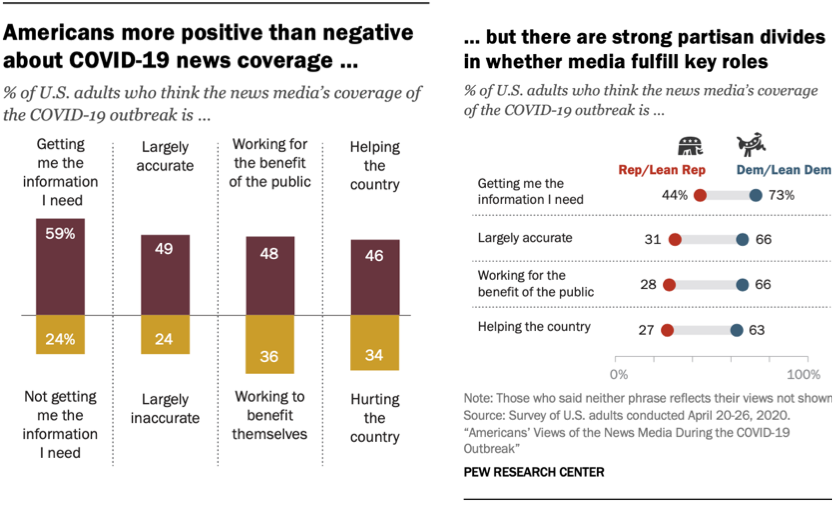

https://www.journalism.org/2020/05/08/americans-views-of-the-news-media-during-the-covid-19-outbreak/

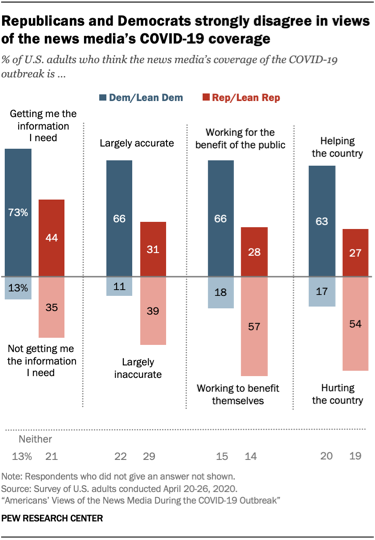

In [1]:
# the statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
cd "/Users/datalab/bigdata/Pathways April 2020 (ATP W66)/"

/Users/datalab/bigdata/Pathways April 2020 (ATP W66)


In [3]:
ls

Pathways April 2020 (ATP W66) Methodology.pdf*
Pathways April 2020 (ATP W66) Questionnaire.pdf*
Pathways April 2020 (ATP W66) Readme.txt*
Pathways April 2020 (ATP W66) Topline.pdf*
Pathways April 2020 (ATP W66).sav*


First of all, we install the pyreadstat module, which allows us to import SPSS files as DataFrames 

In [10]:
!pip install pyreadstat

     |████████████████████████████████| 527 kB 233 kB/s eta 0:00:01


In [185]:
# df = pd.read_spss('Pathways April 2020 (ATP W66).sav')
# df.head()

In [5]:
import pyreadstat
df, meta = pyreadstat.read_sav('Pathways April 2020 (ATP W66).sav')
df.head(5)


,QKEY,Device_Type_W66,LANG_W66,FORM_W66,COMATTACH_W66,MH_TRACK_a_W66,MH_TRACK_b_W66,MH_TRACK_c_W66,MH_TRACK_d_W66,MH_TRACK_e_W66,...,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,F_HISP_ORIGIN,F_YEARSINUS,WEIGHT_W66
0,100197.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,3.0,3.0,1.0,3.0,1.0,1.0,6.0,5.0,0.294864
1,100260.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,...,1.0,6.0,2.0,1.0,1.0,1.0,2.0,6.0,5.0,0.689713
2,100314.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,...,1.0,4.0,2.0,1.0,3.0,1.0,1.0,6.0,5.0,0.442058
3,100363.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,1.0,...,2.0,9.0,1.0,1.0,3.0,1.0,1.0,6.0,5.0,0.423189
4,100446.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,...,2.0,8.0,1.0,1.0,4.0,1.0,1.0,6.0,5.0,0.368074


In [26]:
meta_dict = dict(zip(meta.column_names, meta.column_labels))
meta_dict.keys()

dict_keys(['QKEY', 'Device_Type_W66', 'LANG_W66', 'FORM_W66', 'COMATTACH_W66', 'MH_TRACK_a_W66', 'MH_TRACK_b_W66', 'MH_TRACK_c_W66', 'MH_TRACK_d_W66', 'MH_TRACK_e_W66', 'COVIDFOL_W66', 'COVIDCOVER1_W66', 'COVIDTONE_a_W66', 'COVIDTONE_b_W66', 'COVIDTONE_c_W66', 'COVIDTONE_d_W66', 'COVIDNEWSPLAT_a_W66', 'COVIDNEWSPLAT_b_W66', 'COVIDNEWSPLAT_c_W66', 'COVIDNEWSPLAT_d_W66', 'COVIDNEWSPLAT_e_W66', 'COVIDNEWSPLAT_f_W66', 'COVIDNEWSPLAT_g_W66', 'COVIDNEWSPLAT_h_W66', 'COVIDNEWSPLAT_i_W66', 'COVIDNEWSPLAT_j_W66', 'COVIDNEWSRELY_W66', 'COVIDDEAL_W66', 'COVIDNATLOC_W66', 'COVIDNEWSSWITCH_W66', 'COVIDDISC_W66', 'COVIDSM_W66', 'COVIDSMSHARE_W66', 'COVIDINFO_W66', 'COVIDREPORT_W66', 'COVIDNEWSFINAN_W66', 'COVIDNEWSPAIR_a_W66', 'COVIDNEWSPAIR_b_W66', 'COVIDNEWSPAIR_c_W66', 'COVIDNEWSPAIR_d_W66', 'COVIDNEWSPAIR_e_W66', 'COVIDINFODIFF_W66', 'COVIDWORN_W66', 'COVIDNEWSFEEL_W66', 'COVIDTOPICA_a_W66', 'COVIDTOPICA_b_W66', 'COVIDTOPICA_c_W66', 'COVIDTOPICA_d_W66', 'COVIDTOPICA_e_W66', 'COVIDTOPICA_f_W66', 

In [61]:
meta_dict['F_INCOME'], meta_dict['COVIDCOVER1_W66'], meta_dict['COVIDFOL_W66']

('Family income',
 'COVIDCOVER1_W66. How well do you think the news media have covered the coronavirus outbreak?',
 'COVIDFOL_W66. How closely have you been following news about the outbreak of the coronavirus strain known as COVID-19?')

In [162]:
for i, j in meta_dict.items():
    print(i, j)

QKEY Unique ID
Device_Type_W66 The device used in the latest access of the survey link
LANG_W66 Preferred language
FORM_W66 Form number
COMATTACH_W66 COMATTACH_W66. In general, how attached do you feel to your local community?
MH_TRACK_a_W66 MH_TRACK_a_W66. In the past 7 days, how often have you…      Felt nervous, anxious, or on edge?
MH_TRACK_b_W66 MH_TRACK_b_W66. In the past 7 days, how often have you…      Felt depressed?
MH_TRACK_c_W66 MH_TRACK_c_W66. In the past 7 days, how often have you…      Felt lonely?
MH_TRACK_d_W66 MH_TRACK_d_W66. In the past 7 days, how often have you…      Felt hopeful about the future?
MH_TRACK_e_W66 MH_TRACK_e_W66. In the past 7 days, how often have you…      Had trouble sleeping?
COVIDFOL_W66 COVIDFOL_W66. How closely have you been following news about the outbreak of the coronavirus strain known as COVID-19?
COVIDCOVER1_W66 COVIDCOVER1_W66. How well do you think the news media have covered the coronavirus outbreak?
COVIDTONE_a_W66 COVIDTONE_a_W66. Th

In [6]:
df['WEIGHT_W66'].describe()

count    10139.000000
mean         1.000000
std          1.213926
min          0.065288
25%          0.351129
50%          0.572091
75%          1.107659
max          7.487729
Name: WEIGHT_W66, dtype: float64

In [183]:
df['F_AGECAT'].value_counts(normalize=True).sort_index()


1.0    0.107506
2.0    0.316698
3.0    0.310090
4.0    0.265707
Name: F_AGECAT, dtype: float64

In [204]:
df['COVIDNEWSPAIR_a_W66'].value_counts(normalize=True).sort_index()

1.0    0.564750
2.0    0.208798
3.0    0.226452
Name: COVIDNEWSPAIR_a_W66, dtype: float64

In [205]:
df['COVIDNEWSPAIR_a_W66'].map(meta.variable_value_labels['COVIDNEWSPAIR_a_W66']).value_counts(normalize=True)

Largely accurate      0.564750
Neither applies       0.226452
Largely inaccurate    0.208798
Name: COVIDNEWSPAIR_a_W66, dtype: float64

## Data Cleaning

In [7]:
def clean_missing_data(var):
    # raw data using 99 as missing values
    df[var][df[var]==99] =np.nan 
    df[var] = df[var].fillna(df[var].median())
    return df[var]

for i in df.columns:
    df[i] = clean_missing_data(i)
    

In [8]:
# dummy coding
df['republic'] = [1 if i==1 else 0 for i in df['F_PARTYLN_FINAL'] ]
df['edu'] = [7-i for i in df['F_EDUCCAT2']]

## Weighting

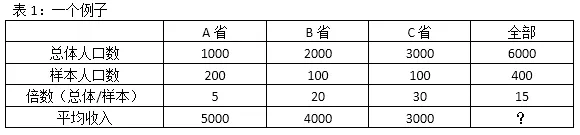


按总体人口数据，总体平均收入应为：(5000 * 1000+4000 * 2000+3000 * 3000)/6000 = 3666.67 元。

- 按样本数据（不加权）：全部人口的样本平均收入 = (5000 * 200+4000 * 100+3000 * 100)/400 = 4250 元。
- 采用总体/样本倍数加权，总体平均收入= (5000 * 200 * 5+4000 * 100 * 20+3000 * 100 * 30)/(200 * 5+100 * 20+100 * 30) = 3666.67元。

**A weighting adjustment technique** can only be carried of proper auxiliary variables are available. 
- Such variables must have been measured in the survey, and there population distribution must be available. 
- Typical auxiliary variables are gender, age, marital status and region of the country. 
- The population distribution of such variables can usually be obtained from national statistical institutes.

|            | Young | Middle | Old  |
| ---------- | ----- | ------ | ---- |
| Population | 30%   | 40%    | 30%  |
| Sample     | 60%   | 30%    | 10%  |
| Weight     | 0.5   | 1.33   |  3   |

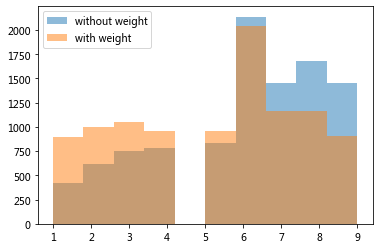

In [160]:
plt.hist(df["F_INCOME"], alpha =0.5, label = 'without weight')
plt.hist(df["F_INCOME"], weights=df["WEIGHT_W66"], alpha = 0.5, label = 'with weight')
plt.legend();

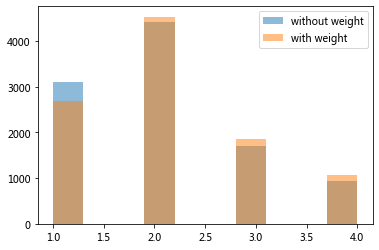

In [161]:
plt.hist(df["COVIDCOVER1_W66"], alpha =0.5, label = 'without weight')
plt.hist(df["COVIDCOVER1_W66"], weights=df["WEIGHT_W66"], alpha = 0.5, label = 'with weight')
plt.legend();

## Sampling with weight

In [108]:
df2 = df.sample(frac=0.66, weights=df['WEIGHT_W66'], random_state = 2020) 
df2.head(5)

,QKEY,Device_Type_W66,LANG_W66,FORM_W66,COMATTACH_W66,MH_TRACK_a_W66,MH_TRACK_b_W66,MH_TRACK_c_W66,MH_TRACK_d_W66,MH_TRACK_e_W66,...,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,F_HISP_ORIGIN,F_YEARSINUS,WEIGHT_W66
9997,2.019011e+11,1.0,1.0,1.0,2.0,3.0,2.0,3.0,4.0,3.0,...,2.0,5.0,2.0,1.0,5.0,1.0,1.0,2.0,4.0,0.284252
8833,2.019010e+11,3.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,...,2.0,1.0,3.0,1.0,3.0,2.0,2.0,6.0,5.0,7.476299
4964,2.018011e+11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,3.0,3.0,3.0,3.0,1.0,2.0,6.0,5.0,7.476299
2919,2.017012e+11,3.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,...,1.0,2.0,3.0,1.0,3.0,1.0,2.0,6.0,5.0,4.243243
3452,2.018010e+11,2.0,1.0,2.0,4.0,2.0,1.0,2.0,1.0,3.0,...,2.0,4.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,2.504054


In [109]:
import numpy as np

print(df[['F_INCOME']].apply(np.average, weights=df['WEIGHT_W66']),'\n',
df[['F_INCOME']].apply(np.average),'\n',
df2[['F_INCOME']].apply(np.average)    )

F_INCOME    9.632119
dtype: float64 
 F_INCOME    9.897722
dtype: float64 
 F_INCOME    9.887926
dtype: float64


In [55]:
len(df), len(df2), df2[['F_INCOME']].apply(np.average)

(10139,
 2028,
 F_INCOME    9.970414
 dtype: float64)

## Weighted Regression: WLS vs. GLM


The weights are presumed to be (proportional to) the inverse of the variance of the observations. That is, if the variables are to be transformed by 1/sqrt(W) you must supply weights = 1/W.

> sm.WLS?

https://www.coursera.org/learn/fitting-statistical-models-data-python

https://www.coursera.org/lecture/fitting-statistical-models-data-python/should-we-use-survey-weights-when-fitting-models-Qzt5p

freq_weights : array_like

    1d array of frequency weights. The default is None. If None is selected
    or a blank value, then the algorithm will replace with an array of 1's
    with length equal to the endog.
    WARNING: Using weights is not verified yet for all possible options
    and results, see Notes.
    
var_weights : array_like

    1d array of variance (analytic) weights. The default is None. If None
    is selected or a blank value, then the algorithm will replace with an
    array of 1's with length equal to the endog.
    WARNING: Using weights is not verified yet for all possible options
    and results, see Notes.

In [182]:
df1=pd.DataFrame({ 'x':range(1,101), 'wt':range(1,101) })

from statsmodels.stats.weightstats import DescrStatsW
wdf = DescrStatsW(df1.x, weights=df1.wt, ddof=1) 
print('without weight, the mean value is: ', np.mean(df1.x))
print( 'with weight, the mean value is: ', wdf.mean )
print( wdf.std )
print( wdf.quantile([0.25,0.50,0.75]) )

without weight, the mean value is:  50.5
with weight, the mean value is:  67.0
23.687784005919827
p
0.25    50
0.50    71
0.75    87
dtype: int64


In [201]:
# 'COVIDFOL_W66. How closely have you been following news about the outbreak of the coronavirus
import statsmodels.api as sm
X = sm.add_constant(df[['F_INCOME','F_AGECAT', 'edu', 'republic','COVIDCOVER1_W66', 'MH_TRACK_a_W66', 
                        'MH_TRACK_b_W66', 'MH_TRACK_d_W66', 'MH_TRACK_d_W66', 'MH_TRACK_e_W66']])
y = df['COVIDFOL_W66']
reg = sm.OLS(y,X, freq_weights=df['WEIGHT_W66'])
results = reg.fit()
reg1 = sm.GLM(y,X)
results1 = reg1.fit()
reg2 = sm.GLM(y,X, freq_weights=df['WEIGHT_W66'])
results2 = reg2.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:           COVIDFOL_W66   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     158.4
Date:                Thu, 14 May 2020   Prob (F-statistic):          1.33e-281
Time:                        00:34:56   Log-Likelihood:                -9776.3
No. Observations:               10139   AIC:                         1.957e+04
Df Residuals:                   10129   BIC:                         1.964e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8951      0.046     

In [202]:
print(results1.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:           COVIDFOL_W66   No. Observations:                10139
Model:                            GLM   Df Residuals:                    10129
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.40316
Method:                          IRLS   Log-Likelihood:                -9776.3
Date:                Thu, 14 May 2020   Deviance:                       4083.6
Time:                        00:35:03   Pearson chi2:                 4.08e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8951      0.046     

In [203]:
print(results2.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:           COVIDFOL_W66   No. Observations:                10139
Model:                            GLM   Df Residuals:                 10129.00
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                         0.47043
Method:                          IRLS   Log-Likelihood:                -10559.
Date:                Thu, 14 May 2020   Deviance:                       4765.0
Time:                        00:35:04   Pearson chi2:                 4.76e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.9164      0.047     

## GLM Binomial Regression

https://www.statsmodels.org/stable/glm.html

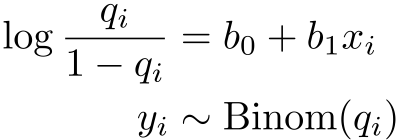

In [9]:
# Largely accurate 
from statsmodels.genmod import families
dfs = df[df['COVIDNEWSPAIR_a_W66']!=2]
X = sm.add_constant(dfs[['F_INCOME','F_AGECAT', 'edu', 'republic','COVIDCOVER1_W66', 'MH_TRACK_a_W66', 
                        'MH_TRACK_b_W66', 'MH_TRACK_d_W66', 'MH_TRACK_d_W66', 'MH_TRACK_e_W66']])
y =[1 if i==1 else 0 for i in  dfs['COVIDNEWSPAIR_a_W66']]
reg1 = sm.GLM(y,X, family=families.Binomial())
results1 = reg1.fit()
reg2 = sm.GLM(y,X, family=families.Binomial(), freq_weights=dfs['WEIGHT_W66'])
results2 = reg2.fit()
print(results2.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 8022
Model:                            GLM   Df Residuals:                  7694.52
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4259.8
Date:                Thu, 14 May 2020   Deviance:                       8519.6
Time:                        13:10:17   Pearson chi2:                 7.66e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.8958      0.188     

In [10]:
# Largely inaccurate 
y =[1 if i==3 else 0 for i in  dfs['COVIDNEWSPAIR_a_W66']]
reg1 = sm.GLM(y,X, family=families.Binomial())
results1 = reg1.fit()
reg2 = sm.GLM(y,X, family=families.Binomial(), freq_weights=dfs['WEIGHT_W66'])
results2 = reg2.fit()
print(results2.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 8022
Model:                            GLM   Df Residuals:                  7694.52
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4259.8
Date:                Thu, 14 May 2020   Deviance:                       8519.6
Time:                        13:10:31   Pearson chi2:                 7.66e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.8958      0.188    -

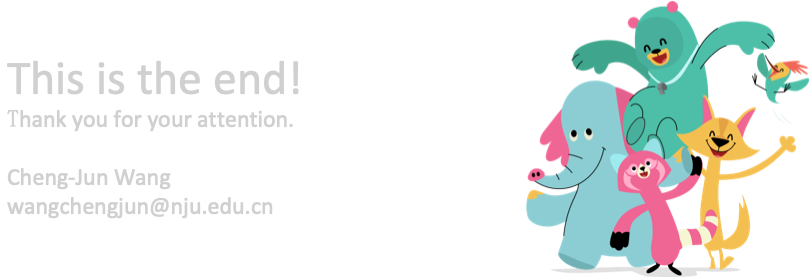